Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Epoch 1/10


C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 945s 4s/step - accuracy: 0.8206 - loss: 0.4589 - val_accuracy: 0.9838 - val_loss: 0.0494
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 12:31 3s/step - accuracy: 0.9062 - loss: 0.1745

C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9062 - loss: 0.1745 - val_accuracy: 1.0000 - val_loss: 0.0253
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 884s 4s/step - accuracy: 0.9773 - loss: 0.0761 - val_accuracy: 0.9861 - val_loss: 0.0328
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 1.0000 - loss: 0.0238 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 885s 4s/step - accuracy: 0.9815 - loss: 0.0596 - val_accuracy: 0.9919 - val_loss: 0.0309
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 1.0000 - loss: 0.0197 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 880s 4s/step - accuracy: 0.9825 - loss: 0.0489 - val_accuracy: 0.9919 - val_loss: 0.0233
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9688 - loss: 0.1078 - val_accuracy: 1.0000 - val_loss: 3.3642e-04
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 723s 3s/step - accuracy: 0.9783 - loss: 0.0585 - val_accuracy: 0.99

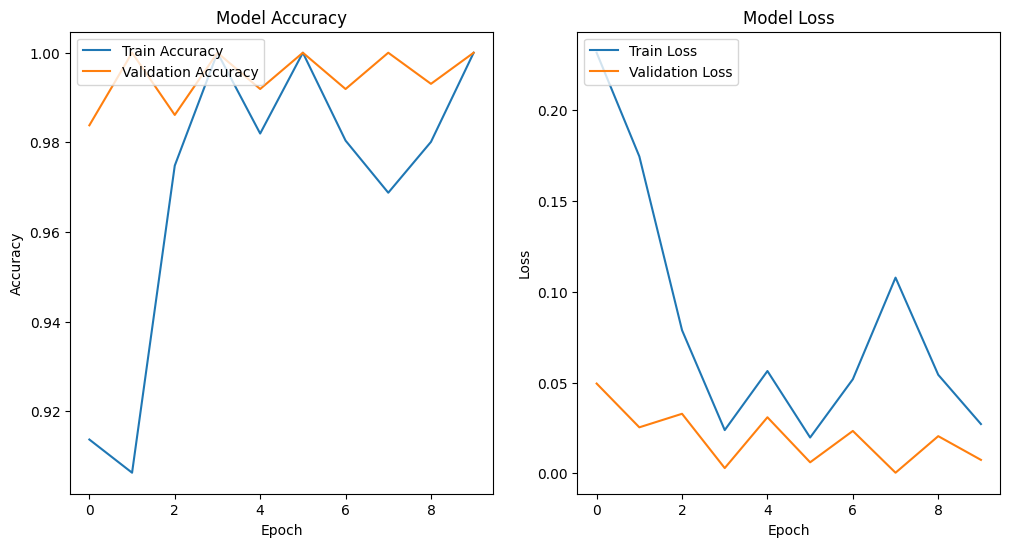

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9987 - loss: 0.0059
Test Loss: 0.009518560953438282, Test Accuracy: 0.9977
28/28 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step


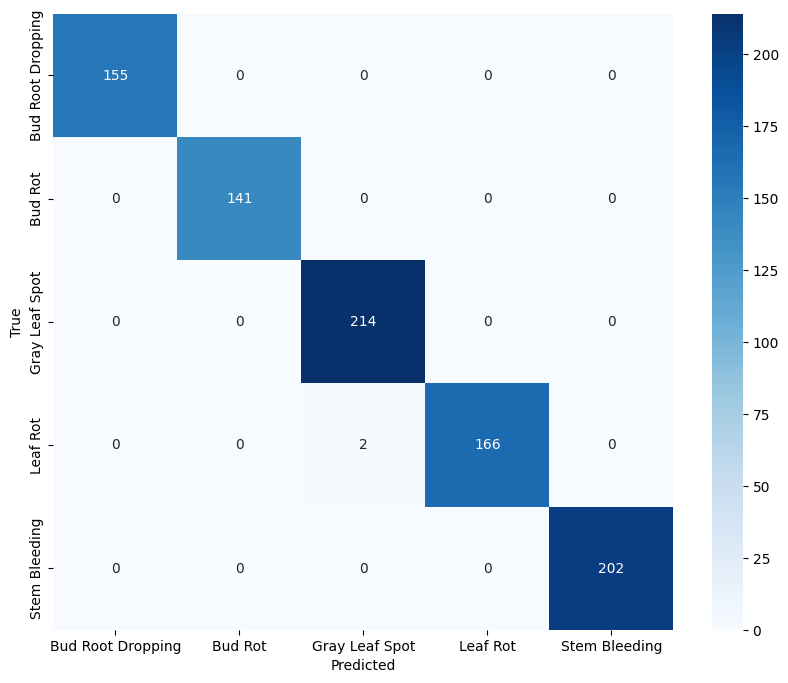

                   precision    recall  f1-score   support

Bud Root Dropping       1.00      1.00      1.00       155
          Bud Rot       1.00      1.00      1.00       141
   Gray Leaf Spot       0.99      1.00      1.00       214
         Leaf Rot       1.00      0.99      0.99       168
    Stem Bleeding       1.00      1.00      1.00       202

         accuracy                           1.00       880
        macro avg       1.00      1.00      1.00       880
     weighted avg       1.00      1.00      1.00       880



In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet201
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\usern\OneDrive\Desktop\divide\train"
test_dir = r"C:\Users\usern\OneDrive\Desktop\divide\test"
validation_dir = r"C:\Users\usern\OneDrive\Desktop\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model
base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Ideal for multi-class classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Save the entire model
model.save(r'densnetrelu.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Print training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy:.4f}')

# Print validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix and Classification Report
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.


C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10


C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 710s 3s/step - accuracy: 0.8305 - loss: 0.4621 - val_accuracy: 0.9815 - val_loss: 0.0394
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 9:21 3s/step - accuracy: 1.0000 - loss: 0.0344

C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 1.0000 - loss: 0.0344 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 668s 3s/step - accuracy: 0.9718 - loss: 0.0761 - val_accuracy: 0.9826 - val_loss: 0.0547
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9688 - loss: 0.1025 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 669s 3s/step - accuracy: 0.9812 - loss: 0.0571 - val_accuracy: 0.9896 - val_loss: 0.0364
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 0.0236 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 673s 3s/step - accuracy: 0.9815 - loss: 0.0551 - val_accuracy: 0.9942 - val_loss: 0.0278
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9688 - loss: 0.0959 - val_accuracy: 1.0000 - val_loss: 2.3004e-04
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 669s 3s/step - accuracy: 0.9838 - loss: 0.0481 - val_accuracy: 0.99

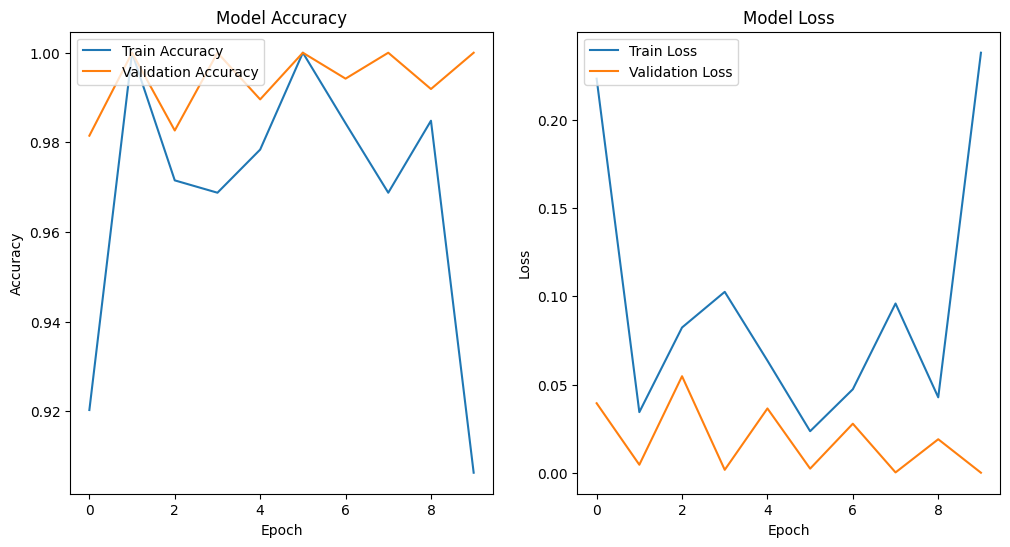

Training Accuracy: 0.9062
Validation Accuracy: 1.0000
Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.9969 - loss: 0.0102
Test Loss: 0.0132132014259696, Test Accuracy: 0.9955
28/28 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step


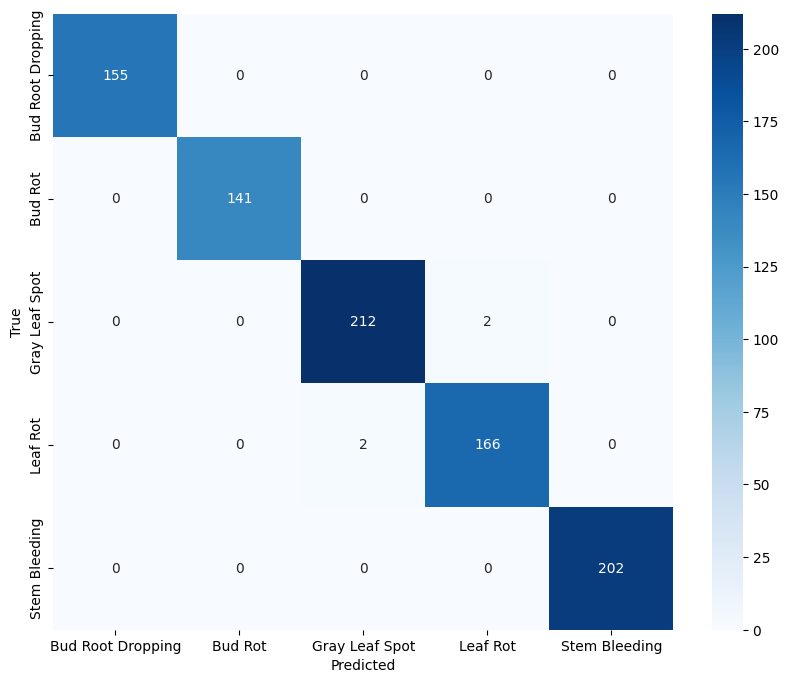

                   precision    recall  f1-score   support

Bud Root Dropping       1.00      1.00      1.00       155
          Bud Rot       1.00      1.00      1.00       141
   Gray Leaf Spot       0.99      0.99      0.99       214
         Leaf Rot       0.99      0.99      0.99       168
    Stem Bleeding       1.00      1.00      1.00       202

         accuracy                           1.00       880
        macro avg       1.00      1.00      1.00       880
     weighted avg       1.00      1.00      1.00       880



In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet201
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\usern\OneDrive\Desktop\divide\train"
test_dir = r"C:\Users\usern\OneDrive\Desktop\divide\test"
validation_dir = r"C:\Users\usern\OneDrive\Desktop\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model
base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256),
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation function
    Dropout(0.5),
    Dense(5, activation='softmax')  # Ideal for multi-class classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Save the entire model
model.save(r'densnet_leakyrelu.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Print training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy:.4f}')

# Print validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix and Classification Report
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.
Epoch 1/10


C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 719s 3s/step - accuracy: 0.8569 - loss: 0.3828 - val_accuracy: 0.9873 - val_loss: 0.0394
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 9:28 3s/step - accuracy: 1.0000 - loss: 0.0229

C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 1.0000 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 667s 3s/step - accuracy: 0.9791 - loss: 0.0625 - val_accuracy: 0.9873 - val_loss: 0.0294
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 0.0200
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 661s 3s/step - accuracy: 0.9841 - loss: 0.0577 - val_accuracy: 0.9896 - val_loss: 0.0401
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 2.2361e-04
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 665s 3s/step - accuracy: 0.9777 - loss: 0.0620 - val_accuracy: 0.9931 - val_loss: 0.0223
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 6.1541e-04
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 670s 3s/step - accuracy: 0.9850 - loss: 0.0455 - val_accuracy: 

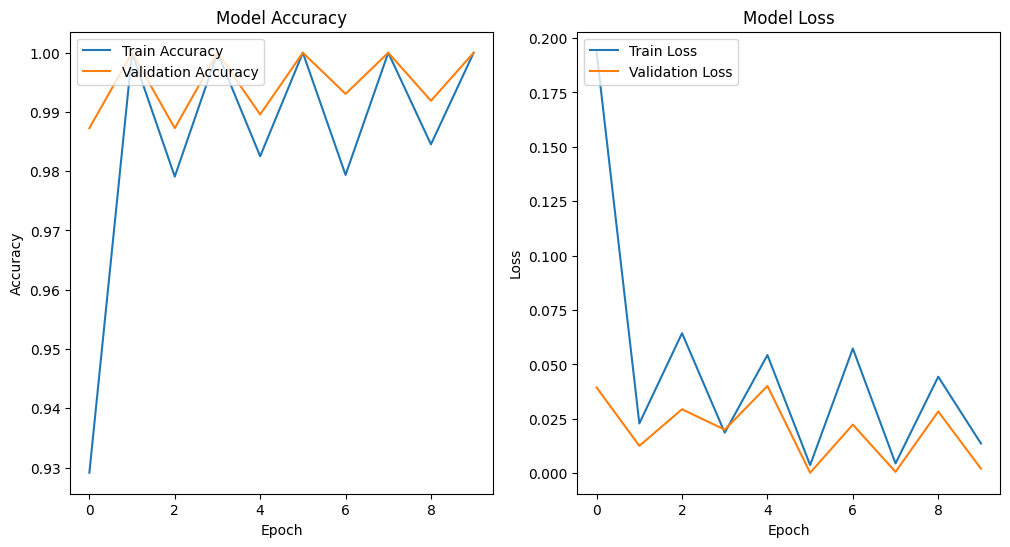

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.9929 - loss: 0.0130
Test Loss: 0.014944643713533878, Test Accuracy: 0.9920
28/28 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step


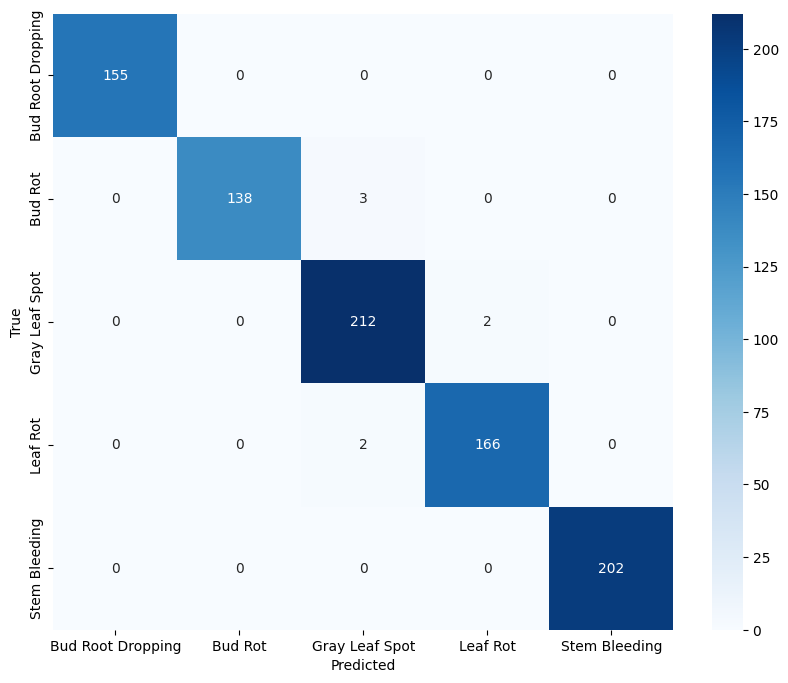

                   precision    recall  f1-score   support

Bud Root Dropping       1.00      1.00      1.00       155
          Bud Rot       1.00      0.98      0.99       141
   Gray Leaf Spot       0.98      0.99      0.98       214
         Leaf Rot       0.99      0.99      0.99       168
    Stem Bleeding       1.00      1.00      1.00       202

         accuracy                           0.99       880
        macro avg       0.99      0.99      0.99       880
     weighted avg       0.99      0.99      0.99       880



In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet201
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\usern\OneDrive\Desktop\divide\train"
test_dir = r"C:\Users\usern\OneDrive\Desktop\divide\test"
validation_dir = r"C:\Users\usern\OneDrive\Desktop\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model
base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='swish'),  # Swish activation function
    Dropout(0.5),
    Dense(5, activation='softmax')  # Ideal for multi-class classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Save the entire model
model.save(r'densnet_swish.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Print training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy:.4f}')

# Print validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix and Classification Report
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.
Epoch 1/10


C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 714s 3s/step - accuracy: 0.8467 - loss: 0.4445 - val_accuracy: 0.9757 - val_loss: 0.0825
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 9:13 3s/step - accuracy: 0.9375 - loss: 0.2666

C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9375 - loss: 0.2666 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 671s 3s/step - accuracy: 0.9679 - loss: 0.0913 - val_accuracy: 0.9919 - val_loss: 0.0363
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9375 - loss: 0.1279 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 667s 3s/step - accuracy: 0.9781 - loss: 0.0686 - val_accuracy: 0.9873 - val_loss: 0.0465
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 1.9161e-04
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 666s 3s/step - accuracy: 0.9850 - loss: 0.0396 - val_accuracy: 0.9907 - val_loss: 0.0324
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9688 - loss: 0.1664 - val_accuracy: 1.0000 - val_loss: 1.0431e-06
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 691s 3s/step - accuracy: 0.9834 - loss: 0.0545 - val_accuracy: 

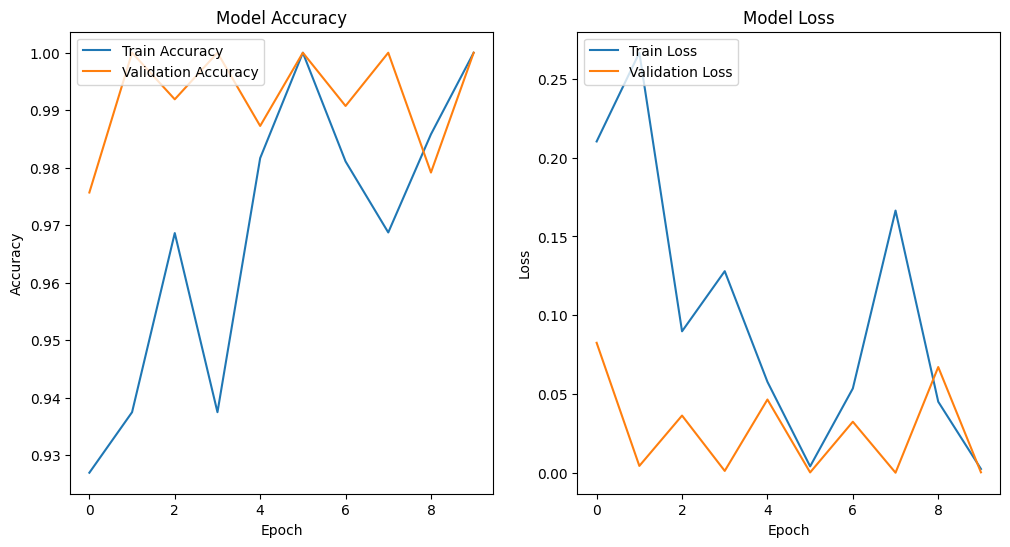

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.9878 - loss: 0.0364
Test Loss: 0.0420321524143219, Test Accuracy: 0.9852
28/28 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step


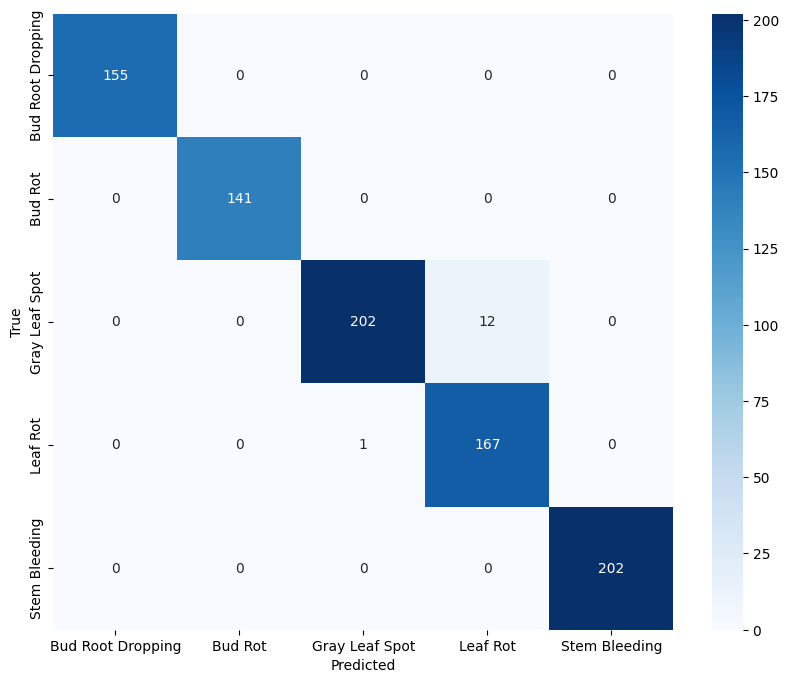

                   precision    recall  f1-score   support

Bud Root Dropping       1.00      1.00      1.00       155
          Bud Rot       1.00      1.00      1.00       141
   Gray Leaf Spot       1.00      0.94      0.97       214
         Leaf Rot       0.93      0.99      0.96       168
    Stem Bleeding       1.00      1.00      1.00       202

         accuracy                           0.99       880
        macro avg       0.99      0.99      0.99       880
     weighted avg       0.99      0.99      0.99       880



In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet201
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\usern\OneDrive\Desktop\divide\train"
test_dir = r"C:\Users\usern\OneDrive\Desktop\divide\test"
validation_dir = r"C:\Users\usern\OneDrive\Desktop\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model
base_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='elu'),  # ELU activation function
    Dropout(0.5),
    Dense(5, activation='softmax')  # Ideal for multi-class classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Save the entire model
model.save(r'densnet_elu.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Print training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy:.4f}')

# Print validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.densenet.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix and Classification Report
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)
